## Definición inicial del problema

Partimos del dataset [Life Expectancy (WHO)](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who). Nuestro objetivo es crear un modelo que prediga la esperanza de vida de un país en base a diferentes variables como el PIB, la mortalidad infantil, el consumo de alcohol, el porcentaje de gasto en salud, etc.

Definiremos como variable objetivo la esperanza de vida y como variables predictoras las demás variables del dataset. Se trata de un problema de regresión, ya que la variable objetivo es continua.

Nuestra medida de evaluación será el error absoluto medio, que es una medida típica para problemas de regresión y que permite la interpretación de los errores en la misma escala que la variable objetivo.

## Análisis exploratorio de datos

In [2]:
import pandas as pd
df = pd.read_csv("../data/life_expectancy.csv")

df.head()

,Country,Year,Status,LifeExpectancy,AdultMortality,InfantDeaths,Alcohol,percentExpenditure,HepatitisB,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19,thinness5-9,Income,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             2938 non-null   object 
 1   Year                2938 non-null   int64  
 2   Status              2938 non-null   object 
 3   LifeExpectancy      2928 non-null   float64
 4   AdultMortality      2928 non-null   float64
 5   InfantDeaths        2938 non-null   int64  
 6   Alcohol             2744 non-null   float64
 7   percentExpenditure  2938 non-null   float64
 8   HepatitisB          2385 non-null   float64
 9   Measles             2938 non-null   int64  
 10  BMI                 2904 non-null   float64
 11  underfiveDeaths     2938 non-null   int64  
 12  Polio               2919 non-null   float64
 13  Total expenditure   2712 non-null   float64
 14  Diphtheria          2919 non-null   float64
 15  HIV/AIDS            2938 non-null   float64
 16  GDP   

Tenemos un total de 2938 filas y 22 columnas.
Existen valores no disponibles en varias de las columnas. Incluida la variable objetivo, `LifeExpectancy`.
Observamos que hay dos variables categóricas en el dataset, `Country` y `Status`.

Consultando la fuente del dataset, podemos clarificar el significado de las variables:


| **Característica**      | **Descripción**                                                                                          | **Tipo de Variable** |
|--------------------------|--------------------------------------------------------------------------------------------------------|-----------------------|
| **Country**             | País sobre el que se hace el estudio.                                                                  | Categórica           |
| **Year**                | Año del estudio.                                                                                       | Numérica             |
| **Status**              | Estado de desarrollo del país.                                                                         | Categórica           |
| **LifeExpectancy**      | Esperanza de vida de país en ese año. (*Variable Objetivo*).                                           | Numérica             |
| **AdultMortality**      | Número de muertes adultas por cada 1000 personas.                                                      | Numérica             |
| **InfantDeaths**        | Número de muertes infantiles por cada 1000 personas.                                                   | Numérica             |
| **Alcohol**             | Litros de consumo de alcohol entre personas mayores de 15 años.                                        | Numérica             |
| **percentExpenditure**  | Porcentaje del gasto en salud sobre el GDP per capita.                                                 | Numérica             |
| **HepatitisB**          | Porcentaje de personas que alcanzaron el año de vida y que fueron inmunizadas contra la hepatitis B.   | Numérica             |
| **Measles**             | Número de casos reportados de sarampión por cada 1000 personas.                                        | Numérica             |
| **BMI**                 | Índice de masa corporal promedio de toda la población del país.                                        | Numérica             |
| **underfiveDeaths**     | Número de muertos de personas con menos de 5 años por cada 1000 personas.                              | Numérica             |
| **Polio**               | Porcentaje de niños de 1 año inmunizados contra la polio.                                              | Numérica             |
| **Total expenditure**   | Porcentaje de gasto en salud sobre el gasto total del gobierno.                                        | Numérica             |
| **Diphtheria**          | Porcentaje de personas que alcanzaron el año de vida y que fueron inmunizadas contra la difteria.      | Numérica             |
| **HIV/AIDS**            | Número de muertes causadas por el SIDA de los niños de 4 años que nacieron vivos por cada 1000 personas.| Numérica             |
| **GDP**                 | Producto Interno Bruto (PIB).                                                                          | Numérica             |
| **Population**          | Población del país.                                                                                    | Numérica             |
| **thinness1-19**        | Prevalencia de delgadez entre personas de 1 a 19 años en porcentaje.                                   | Numérica             |
| **thinness5-9**         | Prevalencia de delgadez entre personas de 5 a 9 años en porcentaje.                                    | Numérica             |
| **Income**              | Ingresos per cápita.                                                                                   | Numérica             |
| **Schooling**           | Número de años que estudia la gente.                                                                   | Numérica             |


In [4]:
df["Country"].value_counts()

Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: count, Length: 193, dtype: int64

In [5]:
df["Year"].value_counts()

Year
2013    193
2015    183
2014    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: count, dtype: int64

In [6]:
df['Status'].value_counts()

Status
Developing    2426
Developed      512
Name: count, dtype: int64

Podemos observar que tenemos distintos registros por país, correspondientes a distintos años en el rango de 2000 a 2015.

Por otro lado, la variable `Status` indica si un país es desarrollado o en desarrollo.

Es importante valorar qué tratamiento se debe dar en primer lugar a al año y al país.

Escenarios posibles:

1. Si consideramos que vamos a tener el país y buscamos es predecir la esperanza de vida en el futuro en base a las tendencias de las variables predictoras, entonces deberíamos considerar el país como una variable categórica más (y la trataríamos con OHE), mantener la variable `Year` y separar como conjunto de test los últimos años.

2. Si lo que queremos es considerar el impacto de las variables predictoras en la esperanza de vida de un país, entonces deberíamos descartar las variables `Country` y `Year`.

Optaremos por el segundo escenario, descartando ambas variables.

Sin embargo, cuando trabajamos con datos que contienen grupos relacionados (*grouped data*), puede darse un problema de información compartida entre datos del mismo grupo (*shared group information*) ya que:

Las filas del mismo grupo son muy similares:

Por ejemplo, los datos de "España en 2001" y "España en 2002" comparten características muy parecidas (e.g., PIB, población, sistema de salud).
Si estas filas se distribuyen entre el conjunto de entrenamiento y el conjunto de prueba, el modelo puede aprender a "memorizar" patrones específicos de cada grupo en lugar de generalizar.
Cuando el modelo entrena con datos de un grupo y luego se evalúa con datos del mismo grupo en años diferentes, el rendimiento del modelo puede parecer muy bueno (por ejemplo, con un error absoluto medio [MAE] muy bajo).

Las observaciones dentro de un grupo (por ejemplo, "España 2000-2010") tienden a ser muy similares porque comparten patrones, como factores económicos o demográficos.
Si estas observaciones se distribuyen entre el conjunto de entrenamiento y el de prueba, el modelo puede aprovecharse de esa similitud para predecir el resultado en el conjunto de prueba, sin aprender patrones generalizables a otros grupos. Es un caso de **fuga de información (*data leakage*)** en el que información del conjunto de prueba se filtra al modelo durante el entrenamiento indirectamente. Esta fuga de información genera un tipo de *overfitting* (*group-specific overfitting*) que a su vez puede llevar a una evaluación optimista del modelo (*over-optimistic evaluation*).

>Simplificando, si retomamos el símil de que el *overfitting* es como memorizar las preguntas del examen pero no saber generalizar conocimiento, en este caso nos encontraríamos con que el examen, aunque no tiene las mismas preguntas del examen, tiene unas demasiado parecidas, con lo que el conocimiento tampoco está bien generalizado.

Además, Status es una variable probablemente calculada a partir de otras variables, incluyendo la propia target (parece raro pensar que sepamos si un país está desarrollado o no sin tener su esperanza de vida), por lo que la eliminaremos para evitar problemas de multicolinealidad.

In [7]:
df.describe()

,Year,LifeExpectancy,AdultMortality,InfantDeaths,Alcohol,percentExpenditure,HepatitisB,Measles,BMI,underfiveDeaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19,thinness5-9,Income,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


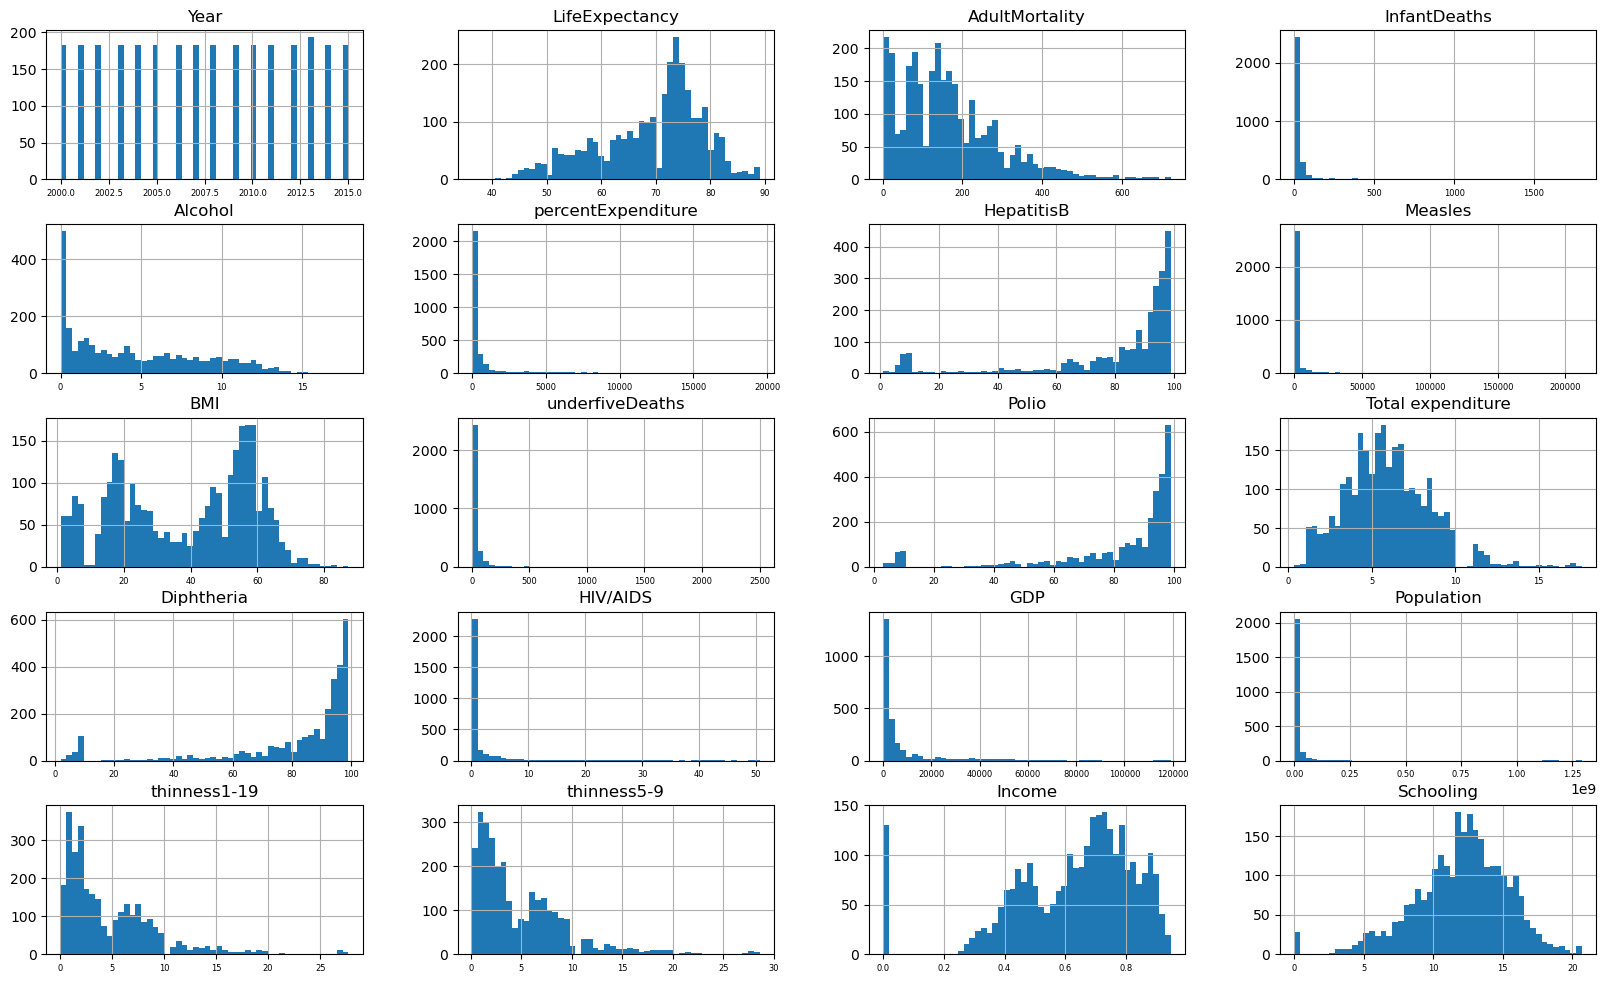

In [8]:
import matplotlib.pyplot as plt

_ = df.hist(bins=50, figsize=(20, 12), xlabelsize=6) 

Para algunas variables observamos gran cantidad de valores en cero, lo que puede indicar que realmente no hay datos disponibles para esos países en esos años, así que deberían ser tratados como valores faltantes. Asumimos que existen países donde el consumo de alcohol puede considerarse nulo, pero es un valor absurdo para la renta ('Income') o la población ('Population').

La mayoría de los datos tienen una **distribución asimétrica**, algunas con cola hacia la derecha y otras hacia la izquierda. Solo 'Scholling', 'Total expenditure', 'Income' y 'LifeExpectancy' se acercan un poco a una distribución gaussiana. Encontramos una **distribución bimodal** en BMI, donde aparecen valores extraños para este indicador (algunos muy bajos y otros muy altos).

La distribución de "Measles" (sarampión) no parece tener mucho sentido. Según su definición, es el numero de casos por cada 1000 habitantes, pero hay valores muy altos que no tienen sentido. Podría ser un error en la carga de datos. Podría tratarse del número total de casos, en cuyo caso deberíamos dividir por la población del país.

BMI (el índice de masa corporal) tiene algunos valores muy bajos que no tienen sentido, pero también algunos muy grandes (lo normal está entre 20 y 32 de media)

<Axes: >

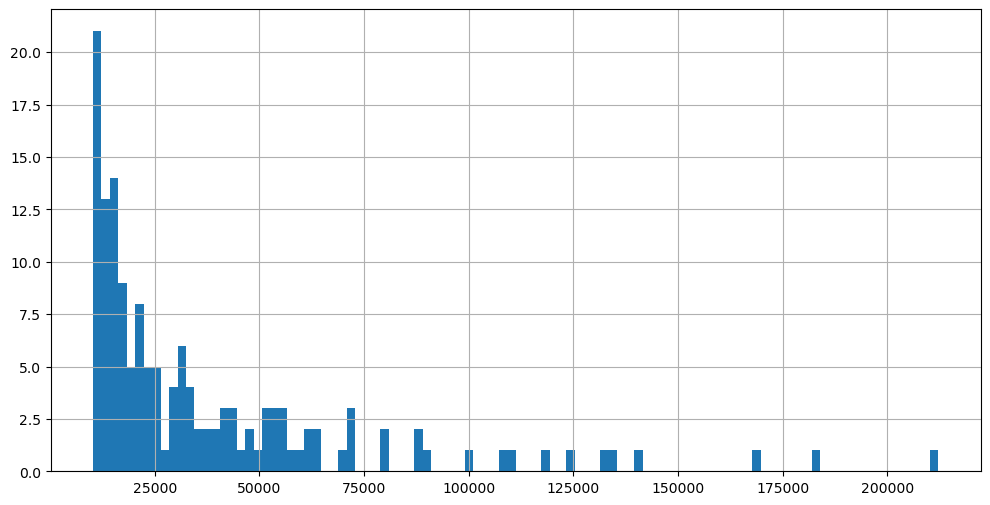

In [9]:
# Show hist for Measles without 0 values
df[df["Measles"] > 10000]["Measles"].hist(bins=100, figsize=(12, 6))

<Axes: >

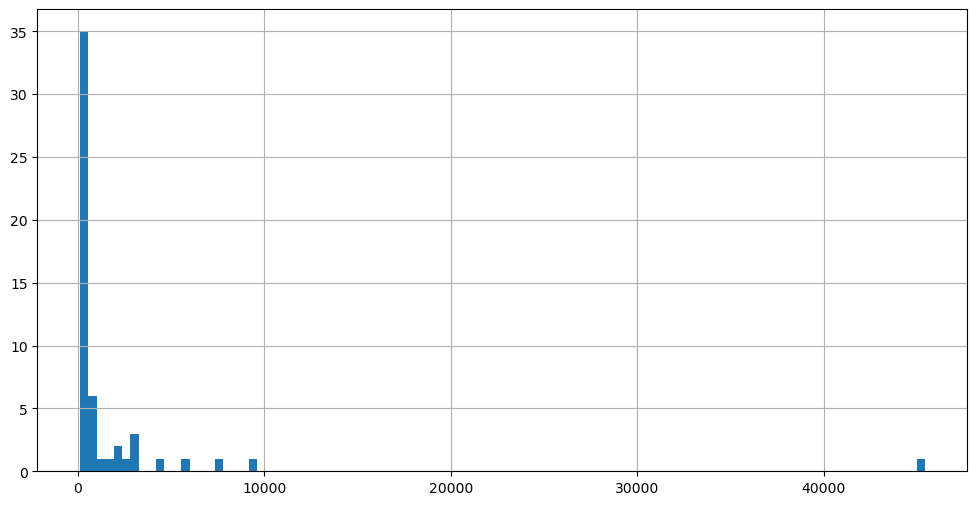

In [10]:
# show hist for measles per population

df["Measles_p"] = df["Measles"]*1000 / df["Population"]
df[df["Measles_p"] > 100]["Measles_p"].hist(bins=100, figsize=(12, 6))


Sigue sin tener sentido, consideraremos eliminar la columna si no tiene especial correlación con la variable objetivo.

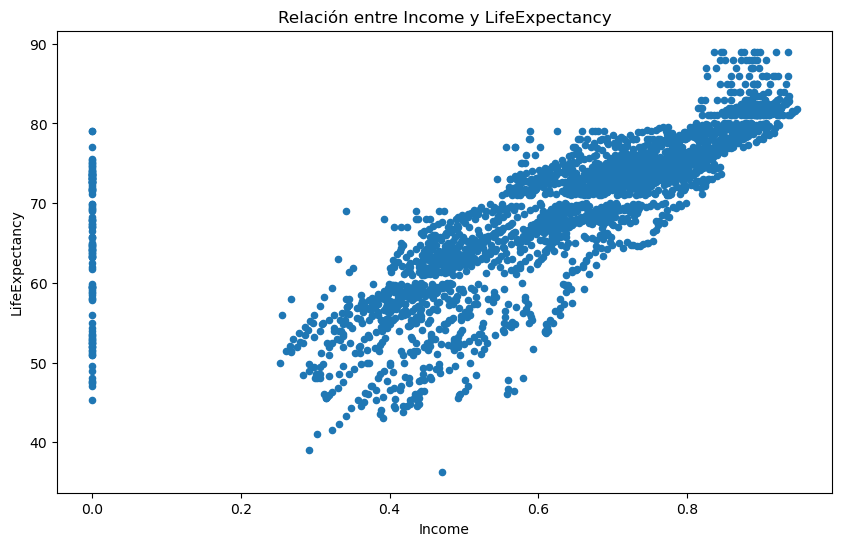

In [11]:

plt.figure(figsize=(10,6))
plt.scatter(df["Income"],df["LifeExpectancy"], s=20)

plt.title("Relación entre Income y LifeExpectancy")
plt.xlabel("Income")
plt.ylabel("LifeExpectancy")

plt.show()

Vemos claramente que los valores de Income a 0 son incorrectos. Podríamos pensar en imputarlos con la media o la medianas; pero eso tiene sentido cuando se asume que los valores perdidos lo son de forma aleatoria (que no hay un patrón en los valores perdidos). Vamos a listar los nombres de los países que tienen valores de Income a 0 para ver si hay un patrón.

In [12]:
df[df["Income"] == 0]["Country"].unique()

array(['Antigua and Barbuda', 'Bahamas', 'Bhutan',
       'Bosnia and Herzegovina', 'Burkina Faso', 'Cabo Verde', 'Chad',
       'Comoros', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Georgia',
       'Grenada', 'Guinea-Bissau', 'Kiribati', 'Lebanon', 'Madagascar',
       'Micronesia (Federated States of)', 'Montenegro', 'Nigeria',
       'Oman', 'Saint Lucia', 'Saint Vincent and the Grenadines',
       'Seychelles', 'South Sudan', 'Suriname',
       'The former Yugoslav republic of Macedonia', 'Timor-Leste',
       'Turkmenistan', 'Uzbekistan', 'Vanuatu'], dtype=object)

Por conocimiento de dominio, podemos observar que los países con 'Income' a cero son en general países con economías muy pequeñas o en conflicto, por lo que parece haber una causa determinada de que sean esos y no simplemente una perdida aleatoria de ciertos datos. En este caso, no tiene sentido imputarles la media o la mediana de los demás países (se puede suponer que esos valores serán considerablemente más altos que los de estos países). Mejores opciones serían imputarles un valor fijo (por ejemplo, el mínimo de la columna), o usar un modelo predictivo para imputarlos en base a otras variables.

### Correlaciones

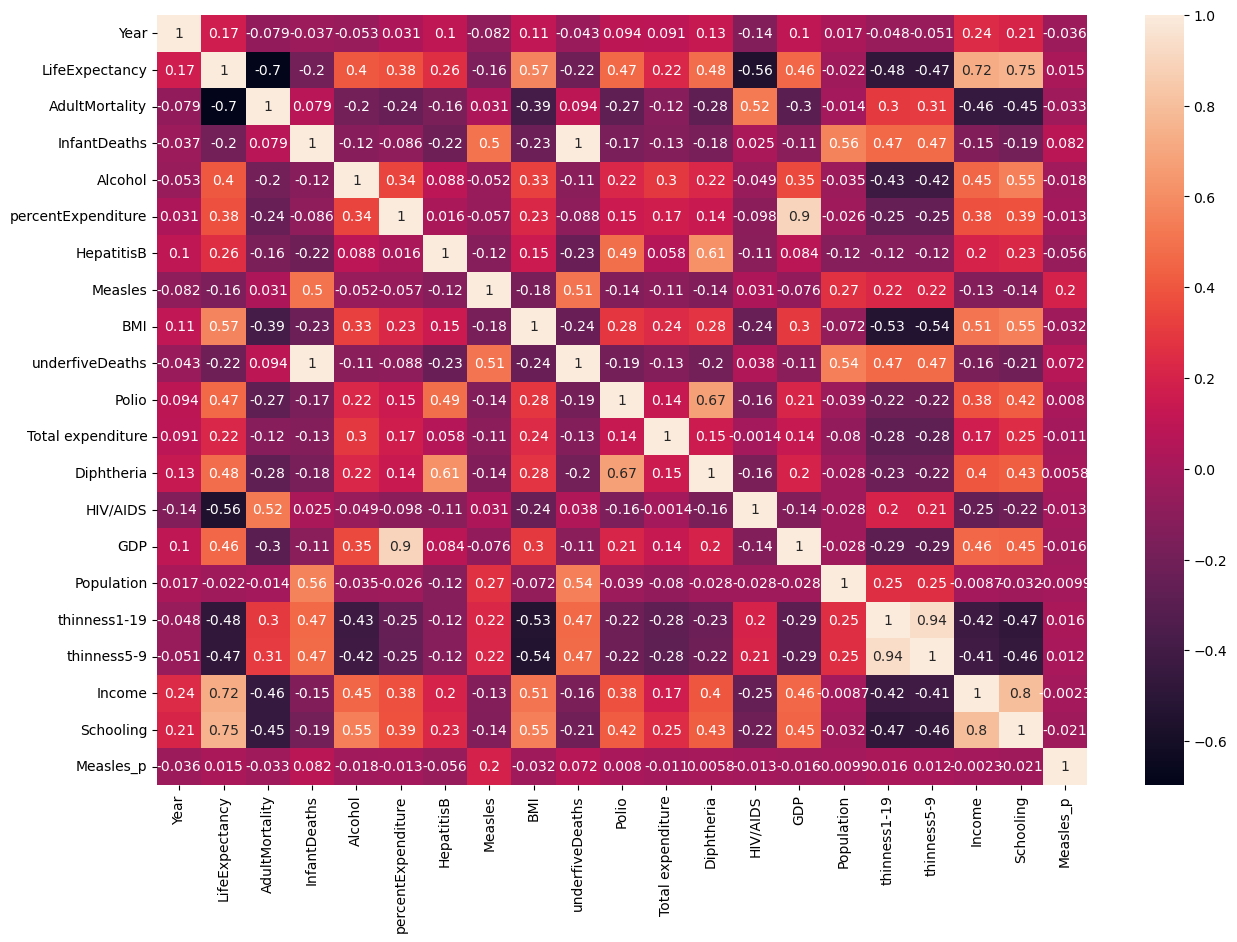

In [13]:
# Calculate correlation matrix
correlation_matrix = df.corr(numeric_only=True)

import seaborn as sns
# Create heatmap
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Observamos la gran colinealidad entre thinness1-19 y thinness5-9, además de su relación en dominio. Para evitar su colinealidad, crearemos una nueva variable que sea la media de ambas.

Algo similar ocurre con "InfantDeaths" y "underfiveDeaths", que también tienen una correlación muy alta. Crearemos una nueva variable que sea la media de ambas.

Por otra parte, tenemos 3 variables midiendo vacunación de enfermedades: "HepatitisB", "Polio" y "Diphtheria". Podríamos crear una nueva variable que sea la media de las tres. Tras probar esta opción y ver que el resultado correla menos, comprobamos la posibilidad de combinar solo las dos variables que más correlan, "Polio" y "Diphtheria", y descartar "HepatitisB", ya que correla menos y además tiene una gran cantidad de valores perdidos.

Ordenamos las *features* por su nivel de correlación con la variable target (cuáles son más predictivas)

In [14]:
import numpy as np
df.corr(numeric_only=True)['LifeExpectancy'].sort_values(ascending=False, key=np.abs)

LifeExpectancy        1.000000
Schooling             0.751975
Income                0.724776
AdultMortality       -0.696359
BMI                   0.567694
HIV/AIDS             -0.556556
Diphtheria            0.479495
thinness1-19         -0.477183
thinness5-9          -0.471584
Polio                 0.465556
GDP                   0.461455
Alcohol               0.404877
percentExpenditure    0.381864
HepatitisB            0.256762
underfiveDeaths      -0.222529
Total expenditure     0.218086
InfantDeaths         -0.196557
Year                  0.170033
Measles              -0.157586
Population           -0.021538
Measles_p             0.015237
Name: LifeExpectancy, dtype: float64

Conclusiones del estudio de la correlación:

- Schooling, Income y BMI son las *features* que mayor correlación positiva muestran. A mayor escolaridad, mayor esperanza de vida.

- AdultMortality o HIV/AIDS tienen una correlación negativa fuerte. Mayor tasa de mortalidad o mayor tasa de VIH está asociada con menor esperanza de vida.

- Population a penas tiene correlación con la variable a predecir.

- Measles tiene una correlación muy baja y previamente no hemos encontrado sentido a sus valores, por lo que la eliminaremos.

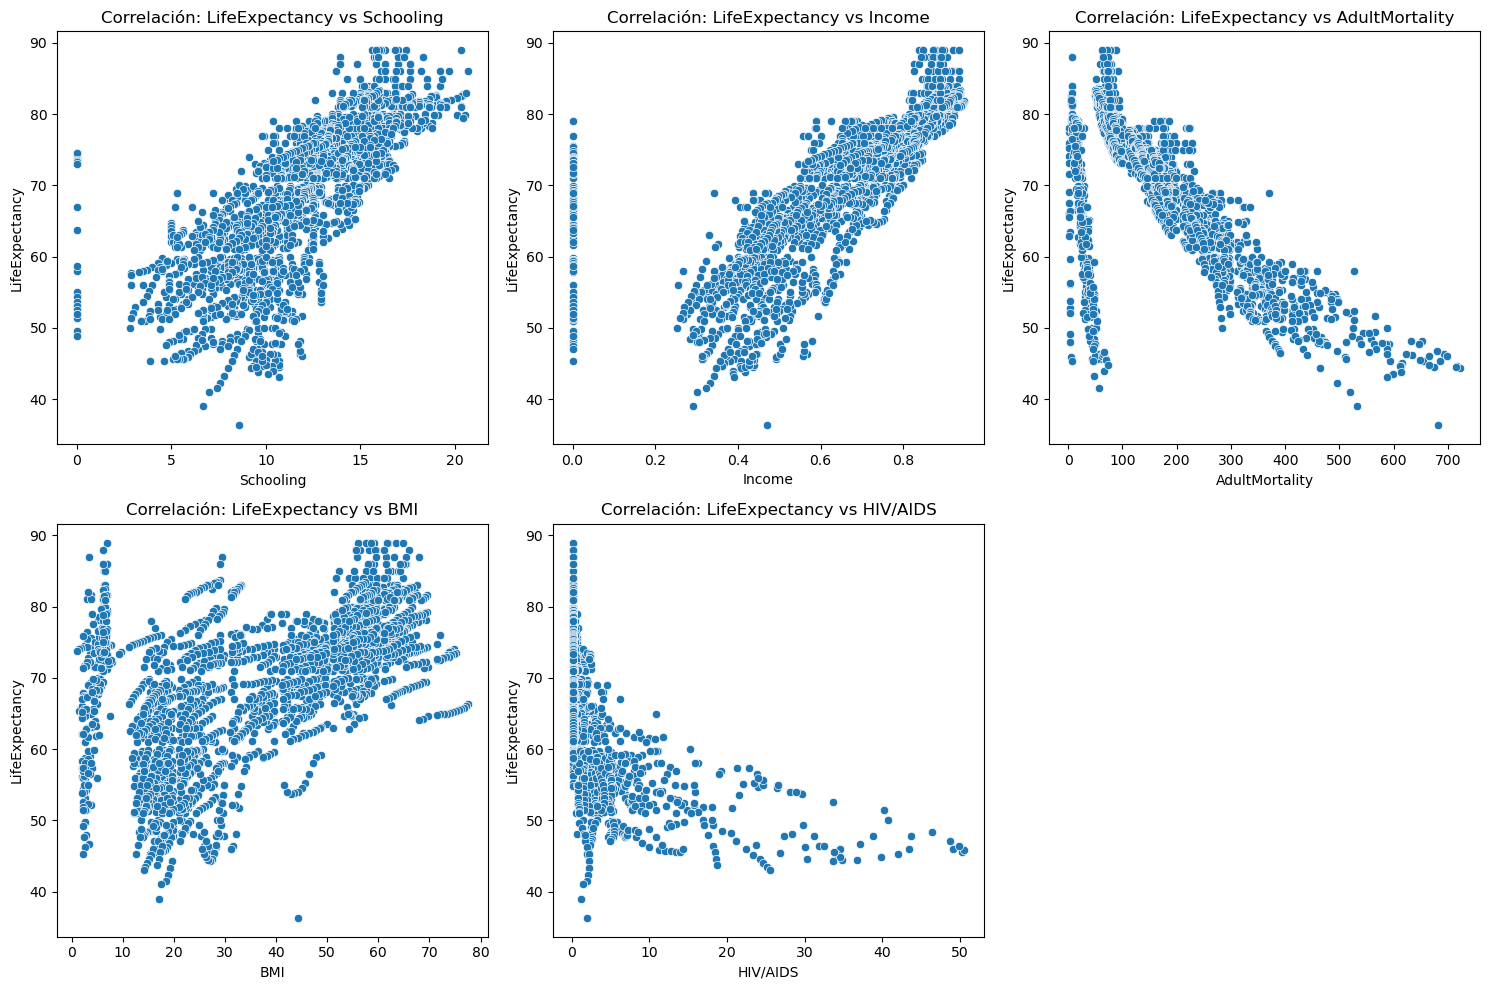

In [15]:
# Seleccionar las columnas más correlacionadas con LifeExpectancy (mayor a 0.4 o menor a -0.4)
high_corr_cols = ["Schooling", "Income", "AdultMortality", "BMI", "HIV/AIDS"] 

# Crear gráficos de dispersión
plt.figure(figsize=(15, 10)) # Set the figure size
for i, col in enumerate(high_corr_cols, 1):
    plt.subplot(2, 3, i) # Create subplots (2 rows, 3 columns) 
    sns.scatterplot(data=df, x=col, y="LifeExpectancy") # Create a scatter plot for each column and LifeExpectancy 
    plt.title(f"Correlación: LifeExpectancy vs {col}")
    plt.xlabel(col)
    plt.ylabel("LifeExpectancy")
plt.tight_layout()
plt.show()

In [16]:
na_per_colum = df.isna().sum()

na = pd.DataFrame({
    'NaN': na_per_colum,
    'Perc': (na_per_colum / df.shape[0] * 100).round(1)    
})

with_nulls = na[na['NaN'] > 0]  # Show the number of missing values in each column
with_nulls.sort_values(by='Perc', ascending=False) # Show the columns with missing values in descending order of percentage

,NaN,Perc
Population,652,22.2
Measles_p,652,22.2
HepatitisB,553,18.8
GDP,448,15.2
Total expenditure,226,7.7
Alcohol,194,6.6
Income,167,5.7
Schooling,163,5.5
BMI,34,1.2
thinness1-19,34,1.2


Se observan porcentajes muy altos de valores faltantes en algunas columnas. Es importante señalar que 'Income' tiene valores perdidos además de valores a 0, por lo que deberíamos tratarlos de forma diferente.

In [17]:
df[df["Income"].isna()]["Country"].unique()

array(["Côte d'Ivoire", 'Cook Islands', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Marshall Islands', 'Monaco',
       'Nauru', 'Niue', 'Republic of Korea', 'Republic of Moldova',
       'San Marino', 'Somalia', 'Tuvalu',
       'United Kingdom of Great Britain and Northern Ireland',
       'United Republic of Tanzania', 'United States of America'],
      dtype=object)

No observamos ningún patrón en los valores nan de 'Income', así que podremos considerar la imputación de la mediana como una buena solución.